In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

df = pd.read_csv('C:\\Users\\Raja\\Downloads\\assignments\\textmining\\tweets.csv')
df.head()

,Unnamed: 0,text
0,0,These are testing times and we need to wake up...
1,1,"RT @narendramodi: By converging around shops, ..."
2,2,"RT @narendramodi: My fellow citizens, \r\n\r\n..."
3,4,"As our Honourable Prime Minister, Shri @Narend..."
4,5,The need of the hour is to absolutely respect ...


In [2]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,Unnamed: 0,text
0,0,These are testing times and we need to wake up...
1,1,": By converging around shops, you are risking ..."
2,2,": My fellow citizens, \r\n\r\nTHERE IS ABSOLUT..."
3,4,"As our Honourable Prime Minister, Shri ji jus..."
4,5,The need of the hour is to absolutely respect ...


In [3]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Unnamed: 0,text,Subjectivity,Polarity
0,0,These are testing times and we need to wake up...,0.000000,0.000000
1,1,": By converging around shops, you are risking ...",0.000000,0.000000
2,2,": My fellow citizens, \r\n\r\nTHERE IS ABSOLUT...",0.533333,0.100000
3,4,"As our Honourable Prime Minister, Shri ji jus...",0.400000,0.200000
4,5,The need of the hour is to absolutely respect ...,0.700000,0.350000
5,6,"Also, special mention to all the medical profe...",0.285714,0.178571
6,7,"Be alert, attentive and aware to combat the th...",0.566667,0.283333
7,8,Let's stay strong and fight the COVID19 outbre...,0.616667,0.466667
8,9,Stay true to the man in the mirror.,0.650000,0.350000
9,10,Wishing everyone a joyful and a safe Holi. May...,0.500000,0.500000


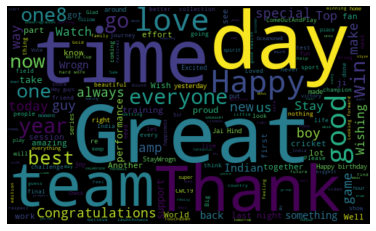

In [4]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Unnamed: 0,text,Subjectivity,Polarity,Analysis
0,0,These are testing times and we need to wake up...,0.000000,0.000000,Neutral
1,1,": By converging around shops, you are risking ...",0.000000,0.000000,Neutral
2,2,": My fellow citizens, \r\n\r\nTHERE IS ABSOLUT...",0.533333,0.100000,Positive
3,4,"As our Honourable Prime Minister, Shri ji jus...",0.400000,0.200000,Positive
4,5,The need of the hour is to absolutely respect ...,0.700000,0.350000,Positive
5,6,"Also, special mention to all the medical profe...",0.285714,0.178571,Positive
6,7,"Be alert, attentive and aware to combat the th...",0.566667,0.283333,Positive
7,8,Let's stay strong and fight the COVID19 outbre...,0.616667,0.466667,Positive
8,9,Stay true to the man in the mirror.,0.650000,0.350000,Positive
9,10,Wishing everyone a joyful and a safe Holi. May...,0.500000,0.500000,Positive


In [6]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:

1) : My fellow citizens, 

THERE IS ABSOLUTELY NO NEED TO PANIC.

Essential commodities, medicines etc. would be available. Ce…

2) As our Honourable Prime Minister, Shri  ji just announced, the whole country is going into a lockdown… 

3) The need of the hour is to absolutely respect and follow the government's directive. Stay home. Stay safe. Stay hea… 

4) Also, special mention to all the medical professionals in the country and around the globe for all the efforts bein… 

5) Be alert, attentive and aware to combat the threat posed by the Covid 19. We, as responsible citizens, need to adhe… 

6) Let's stay strong and fight the COVID19 outbreak by taking all precautionary measures. Stay safe, be vigilant and… 

7) Stay true to the man in the mirror. 

8) Wishing everyone a joyful and a safe Holi. May the festivities bring a lot of colors to your life. 😇 HappyHoli

9) Proud of all the efforts put in by the Indian Women's Cricket Team throughout their T20Worl

In [7]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) Rising up to every challenge. What a game! 💯 👊🇮🇳 NZvIND 

2) : Watch  dress up as 🎅 and bring a little Christmas cheer to the kids who cheer our sportspersons on, all year…

3) It's not very often I get to walk into a store. But when I do, I know just what to get 😎
 … 

4) What happened in Hyderabad is absolutely shameful. 
It's high time we as a society  take charge and put an end to these inhumane tragedies.

5) Love group conditioning sessions. And when Jaddu is in the group, it’s almost impossible to outrun him 😃👌.… 

6) Saw game changers on Netflix. Being a vegetarian athlete has made me realise what I have believed all these years r… 

7) Being restless is no more uncomfortable 👊  



one8innerwear TheBigBillionDays  

8) A game I can never forget. Special night. This man, made me run like in a fitness test 😄  🇮🇳 

9) Let's Go BlueTigers 💪
Goodluck to the  team for the game against Qatar!  QATIND BackTheBlue

10) There's nothing like failure in scien

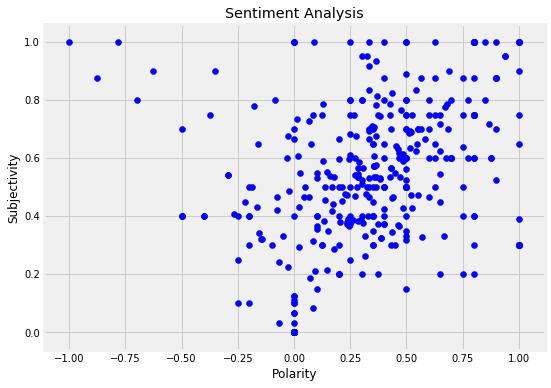

In [8]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [9]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

64.1

In [10]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

8.9

In [11]:
# Show the value counts
df['Analysis'].value_counts()

Positive    309
Neutral     130
Negative     43
Name: Analysis, dtype: int64

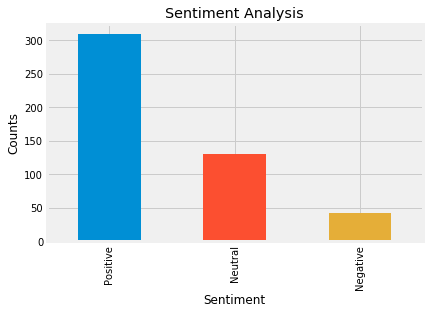

In [12]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()